In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from geopandas import sjoin
from shapely.geometry import Point
import scipy
from scipy.spatial import Voronoi

In [100]:
!pip install geopandas

# it might be better to install it using Anaconda to include all the binaries for your operating system
# http://geopandas.org/install.html#installing-with-anaconda-conda
# `$ conda install geopandas`

Setting up the Coordinate Reference Systems up front in the necessary format.

In [78]:
# Globals
crs_degree = {'init' :'epsg:26910'}

In [11]:
# Paths
taz_path = "/Users/michaltakac/Projects/research/usa-ucberkeley/taz/TAZ_to_join_on_the_demand_data"

int_legs= "/Users/michaltakac/Dropbox/Data Collection/Raw data/SFCTA demand data/internal_fremont_legs.csv"
start_legs = "/Users/michaltakac/Dropbox/Data Collection/Raw data/SFCTA demand data/starting_fremont_legs.csv"
end_legs = "/Users/michaltakac/Dropbox/Data Collection/Raw data/SFCTA demand data/ending_fremont_legs.csv"

In [79]:
# Load TAZ from shapefile
taz = GeoDataFrame.from_file(taz_path + '/Travel Analysis Zones.shp')
taz.head()

,SUPERD,TAZ1454,Shape__Are,Shape__Len,Latitude,Longtitude,geometry
0,18,939,0.0,0.0,37.8148,-122.242,"POLYGON ((566809.6148998439 4185308.337700089,..."
1,18,974,0.0,0.0,37.8291,-122.251,"POLYGON ((565582.5224998422 4186840.779800091,..."
2,18,914,0.0,0.0,37.8463,-122.215,"POLYGON ((569357.0024998434 4190133.857000092,..."
3,18,920,0.0,0.0,37.8133,-122.207,"POLYGON ((570418.8968998421 4185305.157300088,..."
4,18,921,0.0,0.0,37.8055,-122.213,"POLYGON ((569570.3318998424 4184676.565800089,..."


In [88]:
int_data = pd.read_csv(int_legs)
start_data = pd.read_csv(start_legs)
end_data = pd.read_csv(end_legs)

# test if loaded...
int_data.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng
0,87585773,2000-01-01 22:39:00 +0800,37.50937,-121.94962,37.50078,-121.93948
1,87663883,2000-01-01 22:52:00 +0800,37.51764,-121.94493,37.51287,-121.94508
2,87663885,2000-01-02 00:29:00 +0800,37.51287,-121.94508,37.51764,-121.94493
3,87771074,2000-01-01 22:35:00 +0800,37.50237,-121.95432,37.49598,-121.92959
4,87771078,2000-01-02 02:48:00 +0800,37.49598,-121.92959,37.50237,-121.95432


In [89]:
# test if loaded...
start_data.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng
0,87531622,2000-01-02 03:27:00 +0800,37.51941,-121.95007,37.59346,-122.38437
1,87585767,2000-01-01 19:38:00 +0800,37.50937,-121.94962,37.50821,-121.96212
2,87585779,2000-01-02 03:07:00 +0800,37.50937,-121.94962,37.60484,-122.38779
3,87588447,2000-01-02 03:01:00 +0800,37.50618,-121.93459,37.58723,-122.47037
4,87600069,2000-01-02 02:11:00 +0800,37.50737,-121.92912,37.58809,-122.37700


In [90]:
# test if loaded...
end_data.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng
0,87531621,2000-01-02 02:18:00 +0800,37.59346,-122.38437,37.51941,-121.95007
1,87574224,2000-01-01 22:02:00 +0800,37.38812,-121.97604,37.53183,-121.92245
2,87585765,2000-01-01 16:32:00 +0800,37.60484,-122.38779,37.50937,-121.94962
3,87585770,2000-01-01 22:19:00 +0800,37.50821,-121.96212,37.50937,-121.94962
4,87581078,2000-01-02 07:05:00 +0800,37.44256,-121.88313,37.50937,-121.94962


In [91]:
# Process XY coordinates data as Point geometry
int_data_geo_points = [Point(xy) for xy in zip(int_data.start_node_lng, int_data.start_node_lat)]

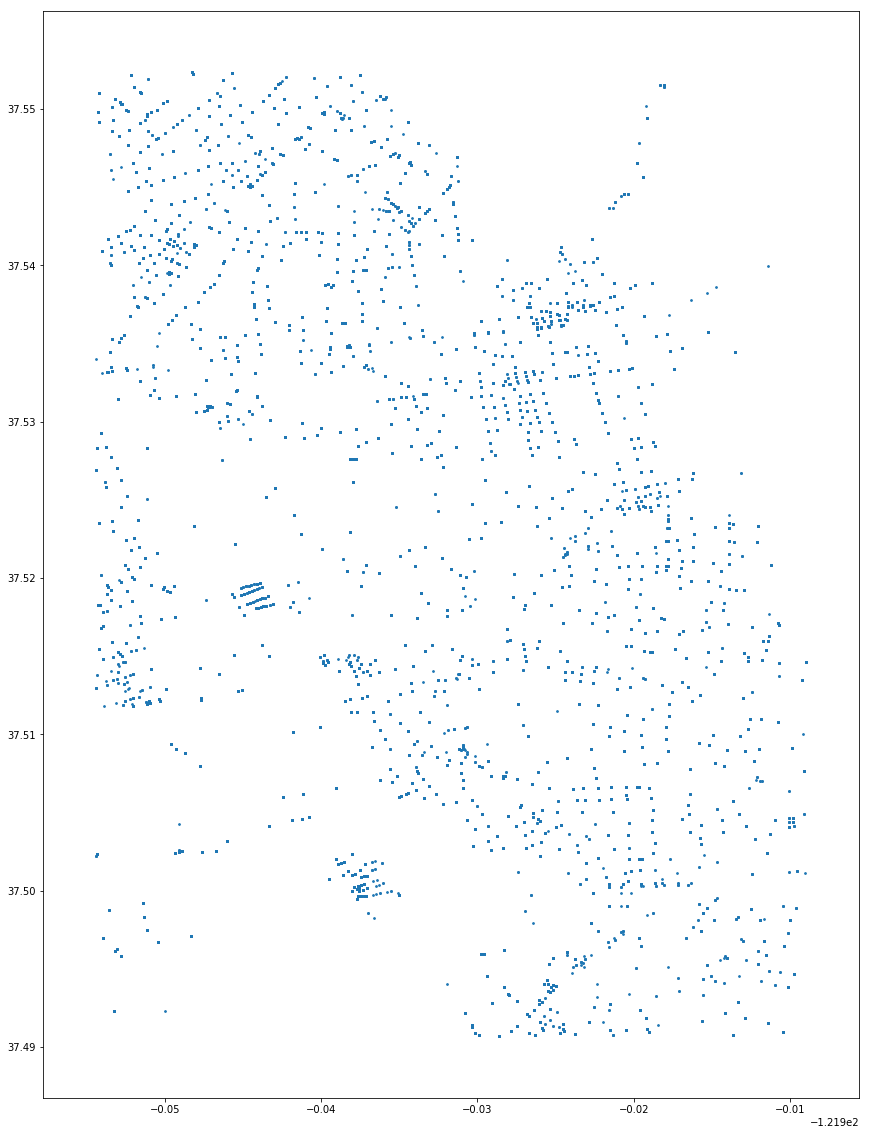

In [122]:
# Visual check - plot points...
GeoPointLocs = GeoDataFrame(int_data, crs=crs_degree, geometry=int_data_geo_points)
GeoPointLocs.plot(markersize=3, figsize=(15,20))

In [94]:
# just checking how the GeoDataFrame looks...
GeoPointLocs.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng,geometry
0,87585773,2000-01-01 22:39:00 +0800,37.50937,-121.94962,37.50078,-121.93948,POINT (-121.94962 37.50937)
1,87663883,2000-01-01 22:52:00 +0800,37.51764,-121.94493,37.51287,-121.94508,POINT (-121.94493 37.51764)
2,87663885,2000-01-02 00:29:00 +0800,37.51287,-121.94508,37.51764,-121.94493,POINT (-121.94508 37.51287)
3,87771074,2000-01-01 22:35:00 +0800,37.50237,-121.95432,37.49598,-121.92959,POINT (-121.95432 37.50237)
4,87771078,2000-01-02 02:48:00 +0800,37.49598,-121.92959,37.50237,-121.95432,POINT (-121.92959 37.49598)


...okay, so we have geometry as `shapely.Point`s

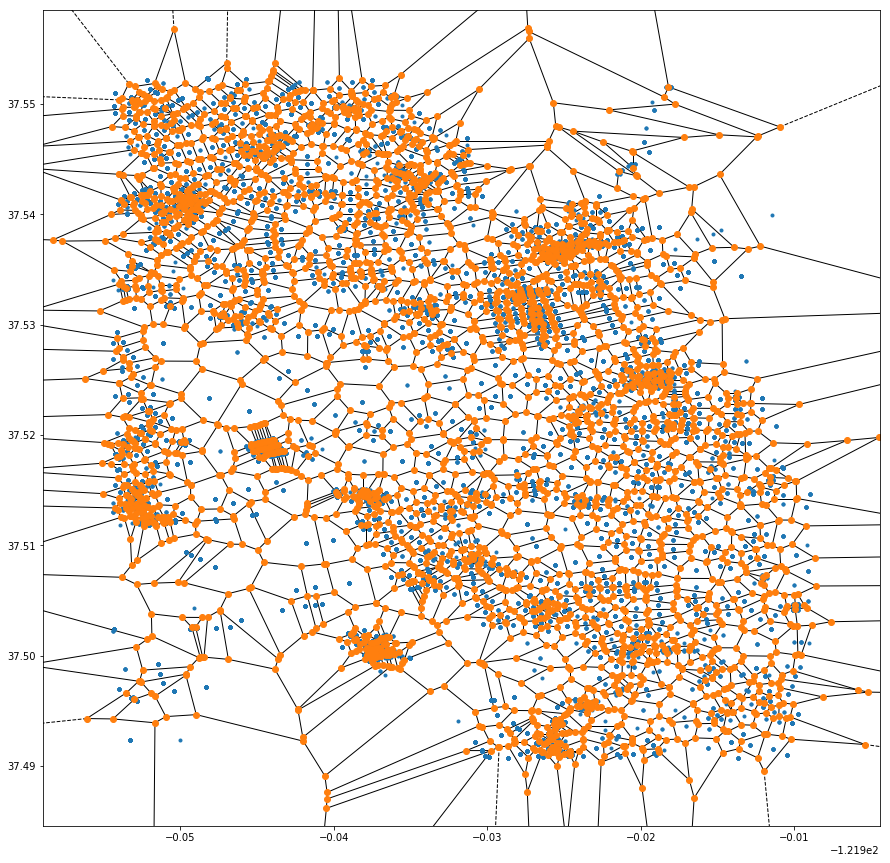

In [95]:
lng_lat_arr = np.array(list(zip(int_data.start_node_lng, int_data.start_node_lat)))
       
# Create Voronoi diagram from array of longitude and latitude coordinates (code from "Spatial Code Primer 2")
vor = Voronoi(lng_lat_arr)
plt.rcParams["figure.figsize"] = [15,15]
scipy.spatial.voronoi_plot_2d(vor)
plt.show()

Here we reuse the code from "Spatial Code Primer 2" (`In [9]`) for defining function that converts Voronoi output to a shapefile (`.shp`):


In [96]:
def voronoi_finite_polygons_2d(vor, radius=None):    
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point. Ridges are the lines between points of the each region polygon
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions. Regions on the outside of the diagram normally extend to infinite - this limits extent
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        print(ridges)
        new_region = [v for v in vertices if v >= 0]
        print(new_region)

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise. Shapefile polygons are drawn in counterclockwise order.
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

Let's test if it works...

In [97]:
regions, vertices = voronoi_finite_polygons_2d(vor)
#print(vertices)
#for region in regions:
#    polygon = vertices[region]
    # Clipping polygon
#    poly = Polygon(polygon)
#    poly = poly.intersection(boundary['geometry'][0])
#    polygon = [p for p in poly.exterior.coords]

#    plt.fill(*zip(*polygon), alpha=0.4)

#plt.plot(np.array(list(zip(int_data.start_node_lng, int_data.start_node_lat)))[:, 0], np.array(list(zip(int_data.start_node_lng, int_data.start_node_lat)))[:, 1], 'ko')
#plt.axis('equal')
#plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
#plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
#plt.show()

[(10269, 20, 44), (10, 44, 243), (3897, 243, 590), (268, -1, 591), (229, -1, 20), (203, 590, 591)]
[591, 20, 44, 243, 590]
[(10269, 20, 51), (50, -1, 20), (492, 51, 625), (12328, -1, 626), (1707, 625, 626)]
[626, 20, 51, 625]


KeyError: 245

In [105]:
taz.head()

,SUPERD,TAZ1454,Shape__Are,Shape__Len,Latitude,Longtitude,geometry
0,18,939,0.0,0.0,37.8148,-122.242,"POLYGON ((566809.6148998439 4185308.337700089,..."
1,18,974,0.0,0.0,37.8291,-122.251,"POLYGON ((565582.5224998422 4186840.779800091,..."
2,18,914,0.0,0.0,37.8463,-122.215,"POLYGON ((569357.0024998434 4190133.857000092,..."
3,18,920,0.0,0.0,37.8133,-122.207,"POLYGON ((570418.8968998421 4185305.157300088,..."
4,18,921,0.0,0.0,37.8055,-122.213,"POLYGON ((569570.3318998424 4184676.565800089,..."


In [106]:
GeoPointLocs.head()

,leg_id,start_time,start_node_lat,start_node_lng,end_node_lat,end_node_lng,geometry
0,87585773,2000-01-01 22:39:00 +0800,37.50937,-121.94962,37.50078,-121.93948,POINT (-121.94962 37.50937)
1,87663883,2000-01-01 22:52:00 +0800,37.51764,-121.94493,37.51287,-121.94508,POINT (-121.94493 37.51764)
2,87663885,2000-01-02 00:29:00 +0800,37.51287,-121.94508,37.51764,-121.94493,POINT (-121.94508 37.51287)
3,87771074,2000-01-01 22:35:00 +0800,37.50237,-121.95432,37.49598,-121.92959,POINT (-121.95432 37.50237)
4,87771078,2000-01-02 02:48:00 +0800,37.49598,-121.92959,37.50237,-121.95432,POINT (-121.92959 37.49598)


In [126]:
# Spatial join
# The how argument in this case defines which geometry is kept. Left keeps left geometry,
# right keeps right geometry, and inner keeps left geometry while only keeping those items that coincide in both.
#df = GeoPointLocs[GeoPointLocs.geometry.notnull()]
int_int_OD = gpd.sjoin(taz, GeoPointLocs, how="left", op='contains').drop(columns='index_right')
int_int_OD.head()

AttributeError: 'NoneType' object has no attribute 'intersection'